In [1]:
#Loading pyspark libraries for KMeans
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [2]:
#Loading other required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Encoding Gender
def change_gender(item):
    if item == "Male":
        return 0
    else:
        return 1

df["Gender"] = df["Gender"].apply(change_gender,1)
df = df[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]

In [5]:
# Converting pandas dataframe into spark dataframe
from pyspark.sql.types import StructType, StructField, NumericType
spark_df = spark.createDataFrame(df)

In [6]:
from pyspark.ml.feature import VectorAssembler
features = tuple(df.columns)
features

('Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)')

In [7]:
#Making a spark dataframe
assembler = VectorAssembler(inputCols=features,outputCol="features")
dataset = assembler.transform(spark_df)
dataset.select("features").show(truncate=False)

+--------------------+
|features            |
+--------------------+
|[0.0,19.0,15.0,39.0]|
|[0.0,21.0,15.0,81.0]|
|[1.0,20.0,16.0,6.0] |
|[1.0,23.0,16.0,77.0]|
|[1.0,31.0,17.0,40.0]|
|[1.0,22.0,17.0,76.0]|
|[1.0,35.0,18.0,6.0] |
|[1.0,23.0,18.0,94.0]|
|[0.0,64.0,19.0,3.0] |
|[1.0,30.0,19.0,72.0]|
|[0.0,67.0,19.0,14.0]|
|[1.0,35.0,19.0,99.0]|
|[1.0,58.0,20.0,15.0]|
|[1.0,24.0,20.0,77.0]|
|[0.0,37.0,20.0,13.0]|
|[0.0,22.0,20.0,79.0]|
|[1.0,35.0,21.0,35.0]|
|[0.0,20.0,21.0,66.0]|
|[0.0,52.0,23.0,29.0]|
|[1.0,35.0,23.0,98.0]|
+--------------------+
only showing top 20 rows



In [8]:
# Creating KMeans 
kmeans = KMeans().setK(5).setSeed(42)
model = kmeans.fit(dataset)

predictions = model.transform(dataset)
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouetter with squared euclidean distance = {}".format(silhouette))

cost = model.computeCost(dataset)
print("Within set sum of squared errors = {}".format(cost))

print("Cluster Centers: ")
ctr = []
centers = model.clusterCenters()

for center in centers:
    ctr.append(center)
    print(center)

Silhouetter with squared euclidean distance = 0.5928136984503509
Within set sum of squared errors = 79332.18630839854
Cluster Centers: 
[ 0.48648649 40.32432432 87.43243243 18.18918919]
[ 0.53846154 32.69230769 86.53846154 82.12820513]
[ 0.6  24.8  41.46 63.7 ]
[ 0.61904762 44.14285714 25.14285714 19.52380952]
[ 0.56603774 53.50943396 54.73584906 48.47169811]


In [9]:
#Visualising the cluster created
centers = pd.DataFrame(ctr,columns=features)
centers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.486486,40.324324,87.432432,18.189189
1,0.538462,32.692308,86.538462,82.128205
2,0.600000,24.800000,41.460000,63.700000
3,0.619048,44.142857,25.142857,19.523810
4,0.566038,53.509434,54.735849,48.471698


In [10]:
predictions_df = predictions.toPandas()
predictions_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),features,prediction
0,0,19,15,39,"[0.0, 19.0, 15.0, 39.0]",3
1,0,21,15,81,"[0.0, 21.0, 15.0, 81.0]",2
2,1,20,16,6,"[1.0, 20.0, 16.0, 6.0]",3
3,1,23,16,77,"[1.0, 23.0, 16.0, 77.0]",2
4,1,31,17,40,"[1.0, 31.0, 17.0, 40.0]",3


In [11]:
predictions_df[predictions_df["prediction"] == 0]["Annual Income (k$)"].values

array([ 70,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,  78,  78,
        78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,
        93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137])

In [12]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')


In [13]:
zero_income = predictions_df[predictions_df["prediction"] == 0]["Annual Income (k$)"].values
zero_spendingScore = predictions_df[predictions_df["prediction"] == 0]["Spending Score (1-100)"].values

one_income = predictions_df[predictions_df["prediction"] == 1]["Annual Income (k$)"].values
one_spendingScore = predictions_df[predictions_df["prediction"] == 1]["Spending Score (1-100)"].values

two_income = predictions_df[predictions_df["prediction"] == 2]["Annual Income (k$)"].values
two_spendingScore = predictions_df[predictions_df["prediction"] == 2]["Spending Score (1-100)"].values

three_income = predictions_df[predictions_df["prediction"] == 3]["Annual Income (k$)"].values
three_spendingScore = predictions_df[predictions_df["prediction"] == 3]["Spending Score (1-100)"].values

four_income = predictions_df[predictions_df["prediction"] == 4]["Annual Income (k$)"].values
four_spendingScore = predictions_df[predictions_df["prediction"] == 4]["Spending Score (1-100)"].values


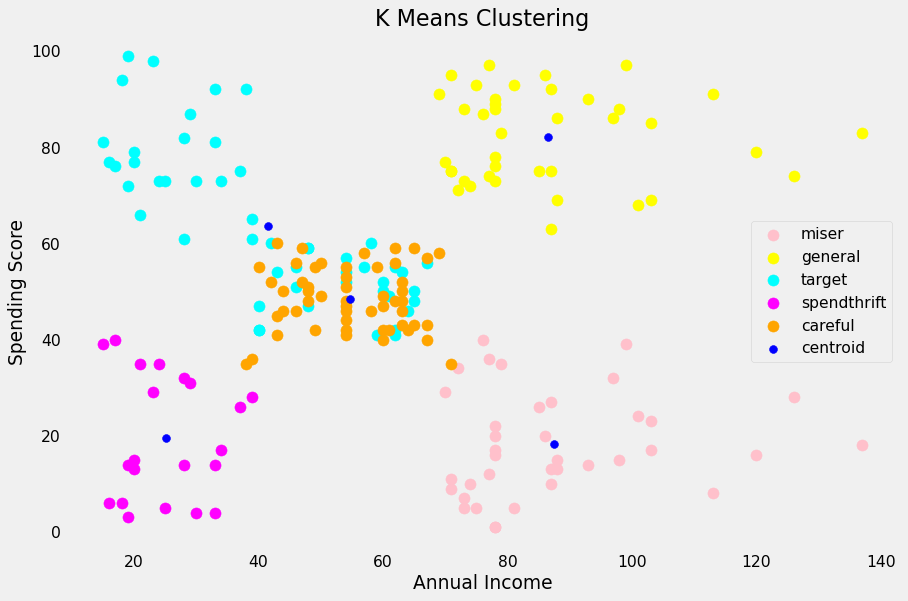

In [119]:
from matplotlib.pyplot import figure

fig = figure(figsize=(12,8), dpi=80)
plt.scatter(zero_income,zero_spendingScore,s=100,c='pink',label='miser')
plt.scatter(one_income,one_spendingScore,s=100,c='yellow',label='general')
plt.scatter(two_income,two_spendingScore,s=100,c='cyan',label='target')
plt.scatter(three_income,three_spendingScore,s=100,c='magenta',label='spendthrift')
plt.scatter(four_income,four_spendingScore,s=100,c='orange',label='careful')
plt.scatter(centers["Annual Income (k$)"],centers["Spending Score (1-100)"],s=50,c='blue',label='centroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [39]:
# Canopy Algorithm
import seaborn as sns
from collections import Counter
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances,paired_distances
from sklearn.preprocessing import normalize

In [40]:
#Making the data ready for the algorithm to accept
data = predictions_df
X = np.array(predictions_df[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]])
y_true = predictions_df["prediction"]

In [41]:
# T1 > T2 for overlapping clusters
# T1 = Distance to centroid point to not include in other clusters
# T2 = Distance to centroid point to include in cluster
# T1 > T2 for overlapping clusters
# T1 < T2 will have points which reside in no clusters
# T1 == T2 will cause all points to reside in mutually exclusive clusters
def canopy(X,T1,T2,distanceMatrix = False, distance_metric='euclidean',filemap = None):
    canopies = dict()
    clusters = np.zeros(X.shape[0])
    if distanceMatrix == False:
        X1_dist = pairwise_distances(X,metric= distance_metric)
    else:
        X1_dist = X
    
    canopy_points = set(range(X.shape[0]))
    
    while canopy_points:
        point = canopy_points.pop()
        i = len(canopies)
        canopies[i] = {
            "c":point,
            "points" : list(np.where(X1_dist[point] < T2)[0])
        }
        clusters[canopies[i]["c"]] = i
        clusters[canopies[i]["points"]] = i
        
        canopy_points = canopy_points.difference(set(np.where(X1_dist[point] < T1)[0]))
        
    return canopies,clusters
        

In [51]:
#Normalizing and setting the threshold values 
N = normalize(X)
T1 = 0.4
T2 = 0.6

#Calling the defined function
canopies,clusters = canopy(N,T1,T2)

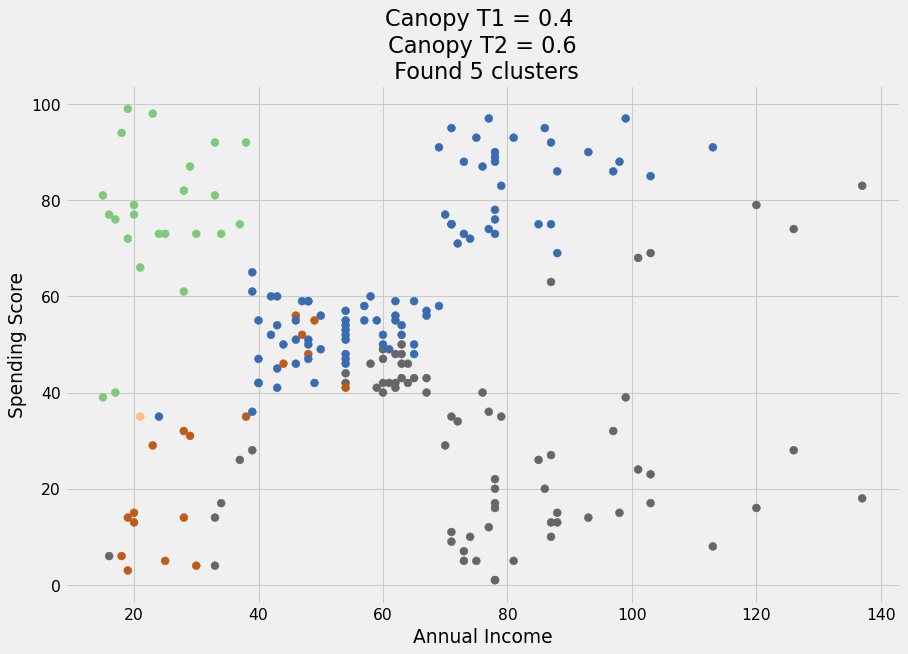

In [67]:
#Visualization of the clustering
figure(figsize=(12,8), dpi=80)
plt.scatter(X[:,2],X[:,3], c=clusters, s=50,cmap='Accent')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("Canopy T1 = {} \n Canopy T2 = {} \n Found {} clusters".format(T1,T2,len(Counter(clusters).keys())))
plt.style.use('fivethirtyeight')
plt.show()


In [33]:
X.shape

(200, 4)

In [53]:
canopies

{0: {'c': 0,
  'points': [0,
   1,
   3,
   4,
   5,
   7,
   9,
   11,
   13,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   23,
   25,
   26,
   27,
   28,
   29,
   31,
   33,
   35,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   125,
   127,
   129,
   131,
   133,
   135,
   137,
   139,
   141,
   143,
   145,
   147,
   149,
   151,
   153,
   155,
   157,
   159,
   161,
   163,
   165,
   167,


In [105]:
#Loading all libraries required for CURE algorithm
from pyclustering.utils import read_sample
from pyclustering.utils import timedcall

from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.samples.definitions import FCPS_SAMPLES

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.cure import cure

In [134]:
#Function to run and visualize the cluster
plt.figure(figsize=(12,8))
def template_clustering(number_clusters, sample, number_represent_points=5, compression=0.5, draw=True, ccore_flag=True):
    # sample = read_sample(path)
    
    cure_instance = cure(sample, number_clusters, number_represent_points, compression, ccore_flag)
    (ticks, _) = timedcall(cure_instance.process)
    
    clusters = cure_instance.get_clusters()
    representors = cure_instance.get_representors()
    means = cure_instance.get_means()

    # print("Sample: ", path, "\t\tExecution time: ", ticks, "\n")
    print("Execution time: ", ticks, "\n")
    #print([len(cluster) for cluster in clusters])

    if draw is True:
        visualizer = cluster_visualizer()

        visualizer.append_clusters(clusters, sample)

        for cluster_index in range(len(clusters)):
            visualizer.append_cluster_attribute(0, cluster_index, representors[cluster_index], '*', 10)
            visualizer.append_cluster_attribute(0, cluster_index, [ means[cluster_index] ], 'o')

        visualizer.set_canvas_title("Cure Clustering for 5 Clusters")
        visualizer.show(display = False,invisible_axis = False)
        

In [135]:
#Getting data from the spark Dataframe
from pyspark.sql.functions import col
d = dataset.select(col("Annual Income (k$)"), col("Spending Score (1-100)")).toPandas().values.tolist()

Execution time:  0.2884537480003928 



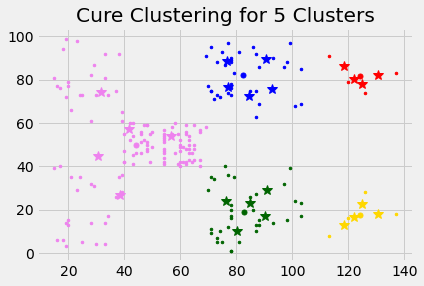

In [139]:
#Execution with 5 clusters
template_clustering(5,d)
plt.show()

/home/training/miniconda3/envs/pyspark_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.
